
### **Whenever we want to try our ML algorithm:**
* **Step 1: Load CSV dataset.**
* **Step 2: Divide the features based on independent and dependent features.**
* **Step 3: Train test split of the dataset.**
* **Step 4: Standardize the data.**
* **Step 5: Train the model(Simple Linear Regression).**
* **Step 6: Performance Metrics.**

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline


### **Step 1: Load CSV dataset.**

In [3]:

df=pd.read_csv("weight-height.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

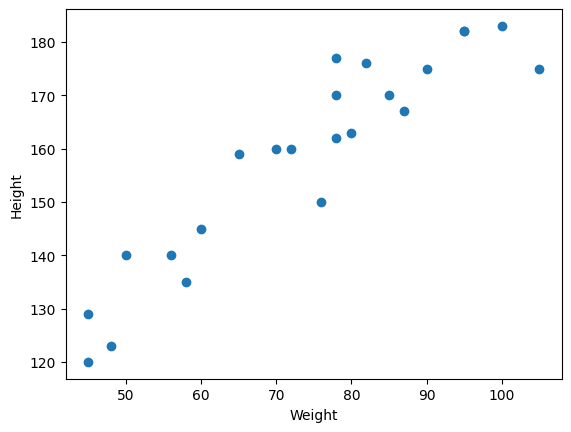

In [4]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

#### Aim is to create a best fit line with available dataset.

### **Step 2: Divide the features based on independent and dependent features.**

In [4]:
X=df[['Weight']]
Y=df["Height"]

### **Step 3: Train test split of the dataset.**

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [6]:
X.shape

(23, 1)

In [7]:
x_train.shape,x_test.shape

((18, 1), (5, 1))

### **Step 4: Standardize the dataset.(Only on Independent Features)**
* Reason we do this is because the units of Height and units of Weight are different. Also Weight is ranging from 40-100. This helps the quick optimizing or convering the "Gradient Descent".
* Not every algorithm needs this Standardization. If it is a distance based algorithm or optimization kind of algorithm. 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
x_train.shape

(18, 1)

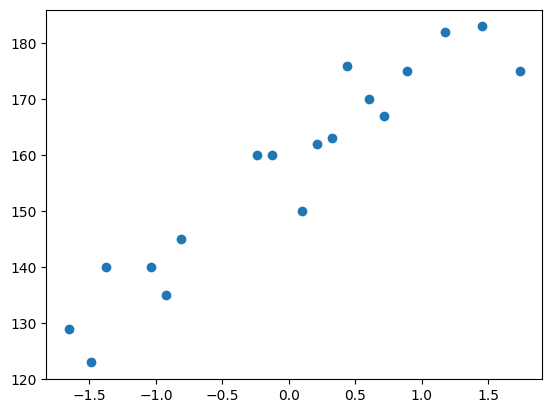

In [11]:
plt.scatter(x_train,y_train)

### **Step 5: Train the model(Simple Linear Regression).**

In [12]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

In [13]:
linreg.fit(x_train,y_train)

LinearRegression()

In [16]:
#### This will give only one  
print(f"The slope/ coefficient of Weight is {linreg.coef_}")
print(f"The Intercept of Weight is {linreg.intercept_}")

The slope/ coefficient of Weight is [17.03440872]
The Intercept of Weight is 157.5


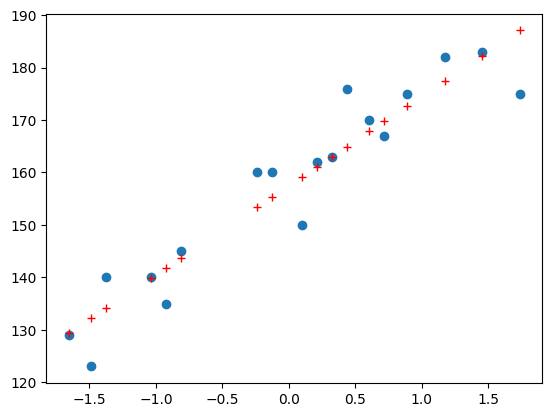

In [18]:
plt.scatter(x_train,y_train)
plt.plot(x_train,linreg.predict(x_train),"r+")

### Predecition of Train Data
1. **predicted height output = intercept + coef_(Weights)**
2. **y_pred_train = 157.5 + 17.03(x_train)**


### Predecition of Test Data
1. **predicted height output = intercept + coef_(Weights)**
2. **y_pred_test = 157.5 + 17.03(x_test)**


In [19]:
y_pred_test=linreg.predict(x_test)

In [20]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [21]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

#### Compare y_test and y_pred for performance.

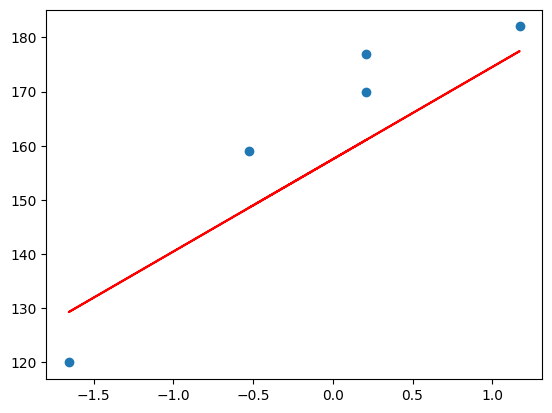

In [24]:
plt.scatter(x_test,y_test)
plt.plot(x_test,linreg.predict(x_test),'r')

### **Step 6: Performance Metrics.**

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

print(f"Mean Squared Error is {mse}")
print(f"Mean Absolute Error is {mae}")
print(f"Root Mean Squared Error is {rmse}")

Mean Squared Error is 109.77592599051664
Mean Absolute Error is 9.822657814519232
Root Mean Squared Error is 10.477400726827081


### R Square and Adjusted R Square

In [30]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred_test)

print(f"R2 Score is {score}")

R2 Score is 0.776986986042344


### R Square and Adjusted R Square

In [32]:
adjustedr2=1-((1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print(f"Adjusted R2 Score is {adjustedr2}")

Adjusted R2 Score is 0.7026493147231252


In [34]:
## New data point weight is 80

scaled_weight=scaler.transform([[80]])
print(scaled_weight)

[[0.32350772]]


c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\PythonBasic\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
print(f"The height predicted for weight 80 kgs is {linreg.predict([scaled_weight[0]])}")

The height predicted for weight 80 kgs is [163.01076266]


### Assumptions
1. By plotting a scatter plot for the test data and predictions and it is linearly distributed, then consider the model have done a good prediction.
2. If the residuals plot gives a normal distribution, then the model is good.
3. If scatter plot with respect to predictions and residuals is uniformly distributed, then the model is good. 

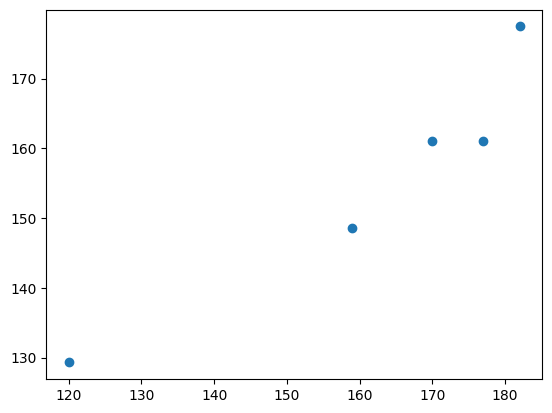

In [41]:
#. 1
plt.scatter(y_test,y_pred_test)

### **Residuals:**
* Difference between test and predicted points. 

In [42]:
# 2.
residuals=y_test-y_pred_test

In [40]:
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

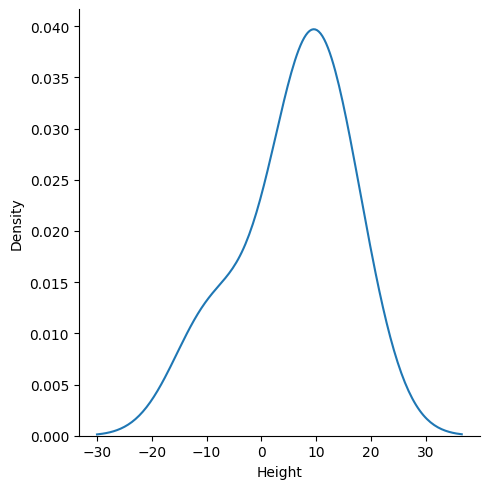

In [43]:
sb.displot(residuals,kind='kde')

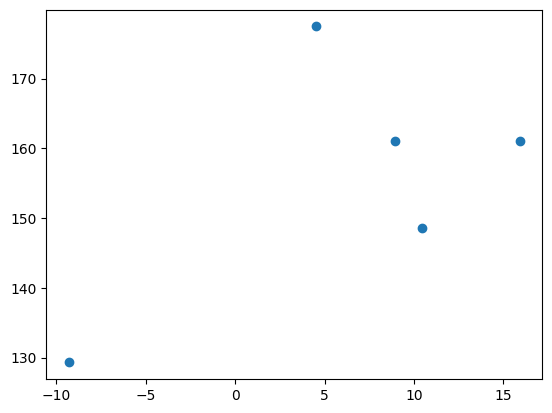

In [44]:
plt.scatter(residuals,y_pred_test)